<a href="https://colab.research.google.com/github/tistZ25/Machine_Learning_Projects/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
# Displaying Top 5 rows of the Dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Displaying Last 5 rows of the Dataset
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# Finding Shape of Our Dataset
data.shape

(10000, 14)

In [8]:
print("Number of Rows", data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Checking Null Values In The Dataset

In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Getting Overall Statistics About The Dataset

In [11]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
data.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# Dropping Irrelevant Features

In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding Categorical Data

In [16]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
data = pd.get_dummies(data, drop_first = True)

In [18]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

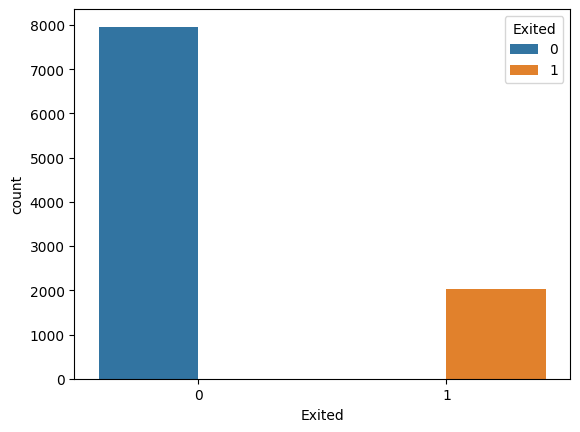

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='Exited', hue='Exited')
plt.show()

In [21]:
X = data.drop('Exited', axis = 1)
y = data['Exited']

# Handling Imbalanced Data With SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [24]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# Splitting The Dataset Into Training Set And Test Set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size = 0.20, random_state = 42)

# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
# Fit and transform training data
X_train = sc.fit_transform(X_train)

# Transforming test data
X_test = sc.transform(X_test)


In [30]:
X_train

array([[-0.28661944,  0.60008619,  0.44386673, ..., -0.5734831 ,
        -0.46350557, -0.84702069],
       [ 1.09355204,  0.09924121, -1.39463451, ..., -0.5734831 ,
        -0.46350557,  1.1806087 ],
       [-0.8843315 ,  0.49991719,  1.54696746, ...,  1.74373056,
        -0.46350557, -0.84702069],
       ...,
       [ 0.2024177 ,  0.19941021,  1.17926722, ..., -0.5734831 ,
        -0.46350557,  1.1806087 ],
       [-1.85153828, -0.30143477, -0.65923401, ..., -0.5734831 ,
        -0.46350557, -0.84702069],
       [ 0.52844246,  1.00076216, -1.39463451, ...,  1.74373056,
        -0.46350557,  1.1806087 ]])

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log = LogisticRegression()

In [33]:
log.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred1 = log.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred1)

0.7859384808537351

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [38]:
precision_score(y_test, y_pred1)

0.7744171392564587

In [39]:
recall_score(y_test, y_pred1)

0.7913715389568577

In [40]:
f1_score(y_test, y_pred1)

0.7828025477707006

In [41]:
# pc = TP / (FP + TP)

In [42]:
# rc = TP / (TP + FN)

# Support Vector Classifier

In [43]:
from sklearn import svm

In [44]:
svm = svm.SVC()

In [45]:
svm.fit(X_train, y_train)

SVC()

In [46]:
y_pred2 = svm.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred2)

0.8405524168236033

In [48]:
precision_score(y_test, y_pred2)

0.8292375551354757

# KNeighbors Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred3 = knn.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred3)

0.8283113622096673

In [54]:
precision_score(y_test, y_pred3)

0.8085889570552147

# Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()

In [57]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred4 = dt.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred4)

0.7925298179535468

In [60]:
precision_score(y_test, y_pred4)

0.7770186335403727

# Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier()

In [63]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
y_pred5 = rf.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred5)

0.8593848085373509

In [66]:
precision_score(y_test, y_pred5)

0.8525845564773452

# Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbc = GradientBoostingClassifier()

In [69]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [70]:
y_pred6 = gbc.predict(X_test)

In [71]:
accuracy_score(y_test, y_pred6)

0.8392969240426867

In [72]:
precision_score(y_test, y_pred6)

0.8347266881028939

# Comparing Accuracy and Precision Scores

In [73]:
final_data = pd.DataFrame({'Models':['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'], 'ACC':[accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3), accuracy_score(y_test, y_pred4), accuracy_score(y_test, y_pred5), accuracy_score(y_test, y_pred6)]})

In [74]:
final_data

,Models,ACC
0,LR,0.785938
1,SVC,0.840552
2,KNN,0.828311
3,DT,0.792530
4,RF,0.859385
5,GBC,0.839297


<Axes: xlabel='Models', ylabel='ACC'>

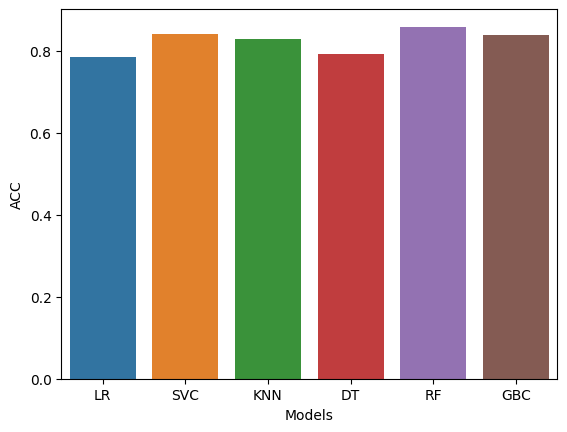

In [75]:
sns.barplot(data=final_data, x='Models', y='ACC')

In [76]:
final_data = pd.DataFrame({'Models':['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'], 'PRE':[precision_score(y_test, y_pred1), precision_score(y_test, y_pred2), precision_score(y_test, y_pred3), precision_score(y_test, y_pred4), precision_score(y_test, y_pred5), precision_score(y_test, y_pred6)]})

In [77]:
final_data

,Models,PRE
0,LR,0.774417
1,SVC,0.829238
2,KNN,0.808589
3,DT,0.777019
4,RF,0.852585
5,GBC,0.834727


<Axes: xlabel='Models', ylabel='PRE'>

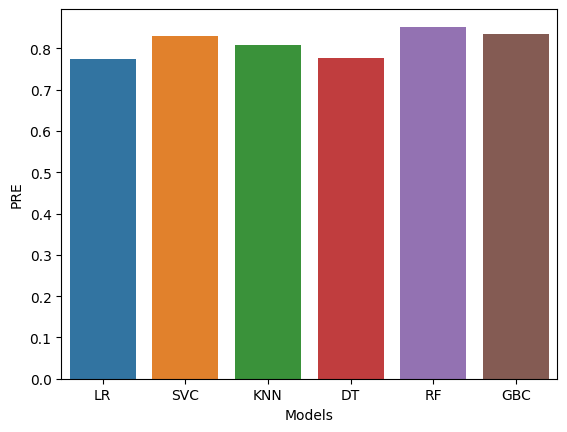

In [78]:
sns.barplot(data=final_data, x='Models', y='PRE')

# Save The Model

In [79]:
X_res = sc.fit_transform(X_res)

In [80]:
rf.fit(X_res, y_res)

RandomForestClassifier()

In [81]:
import joblib

In [82]:
joblib.dump(rf, 'churn_predict_model')

['churn_predict_model']

In [83]:
model = joblib.load('churn_predict_model')

In [84]:
model.predict([[619, 42, 2, 0.0, 0, 0, 0, 101348.88, 0, 0, 0]])


array([1])

# GUI

In [86]:
import ipywidgets as widgets
from IPython.display import display

# Create widgets for input
p1 = widgets.IntText(description="CreditStore")
p2 = widgets.IntText(description="Age")
p3 = widgets.IntText(description="Tenure")
p4 = widgets.FloatText(description="Balance")
p5 = widgets.IntText(description="NumOfProducts")
p6 = widgets.IntText(description="HasCrCard")
p7 = widgets.IntText(description="IsActiveMember")
p8 = widgets.FloatText(description="EstimatedSalary")
p9 = widgets.IntText(description="Geography")
p10 = widgets.IntText(description="Gender")


# Create a button widget for prediction
predict_button = widgets.Button(description="Predict")

# Define a function to handle the prediction
def predict(_):
    p1_value = p1.value
    p2_value = p2.value
    p3_value = p3.value
    p4_value = p4.value
    p5_value = p5.value
    p6_value = p6.value
    p7_value = p7.value
    p8_value = p8.value
    p9_value = p9.value

    if p9_value == 1:
        Geography_Germany = 1
        Geography_Spain = 0
        Geography_France = 0
    elif p9_value == 2:
        Geography_Germany = 0
        Geography_Spain = 1
        Geography_France = 0
    elif p9_value == 3:
        Geography_Germany = 0
        Geography_Spain = 0
        Geography_France = 1

    p10_value = p10.value

    # Retrieve values from other widgets...

    # Perform the prediction
    result = model.predict(sc.transform([[p1_value, p2_value, p3_value, p4_value, p5_value, p6_value, p7_value, p8_value, Geography_Germany, Geography_Spain, p10_value]]))

    # Display the result
    if result == 0:
        print("No Exit")
    else:
        print("Exit")

# Attach the prediction function to the button click event
predict_button.on_click(predict)

# Display the widgets
display(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, predict_button)


IntText(value=0, description='CreditStore')

IntText(value=0, description='Age')

IntText(value=0, description='Tenure')

FloatText(value=0.0, description='Balance')

IntText(value=0, description='NumOfProducts')

IntText(value=0, description='HasCrCard')

IntText(value=0, description='IsActiveMember')

FloatText(value=0.0, description='EstimatedSalary')

IntText(value=0, description='Geography')

IntText(value=0, description='Gender')

Button(description='Predict', style=ButtonStyle())

Exit


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
